In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_12953/1597236955.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


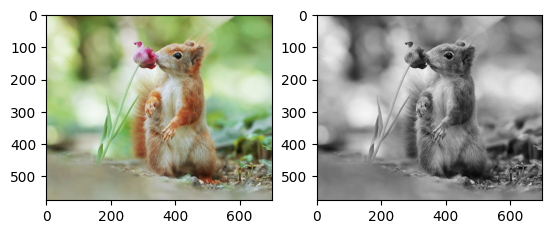

In [6]:
# #---------------------------------------------------------------------------------------------------------------------
# PART I - Transforming an image from color to grayscale
# #---------------------------------------------------------------------------------------------------------------------

# Here we import the image file as an array of shape (nx, ny, nz)
image_file = 'rabbit.jpg'
input_image = imread(image_file)  # this is the array representation of the input image
[nx, ny, nz] = np.shape(input_image)  # nx: height, ny: width, nz: colors (RGB)

# Extracting each one of the RGB components
r_img, g_img, b_img = input_image[:, :, 0], input_image[:, :, 1], input_image[:, :, 2]

# The following operation will take weights and parameters to convert the color image to grayscale
gamma = 1.400  # a parameter
r_const, g_const, b_const = 0.2126, 0.7152, 0.0722  # weights for the RGB components respectively
grayscale_image = r_const * r_img ** gamma + g_const * g_img ** gamma + b_const * b_img ** gamma

# This command will display the grayscale image alongside the original image
fig1 = plt.figure(1)
ax1, ax2 = fig1.add_subplot(121), fig1.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(grayscale_image, cmap=plt.get_cmap('gray'))
fig1.show()

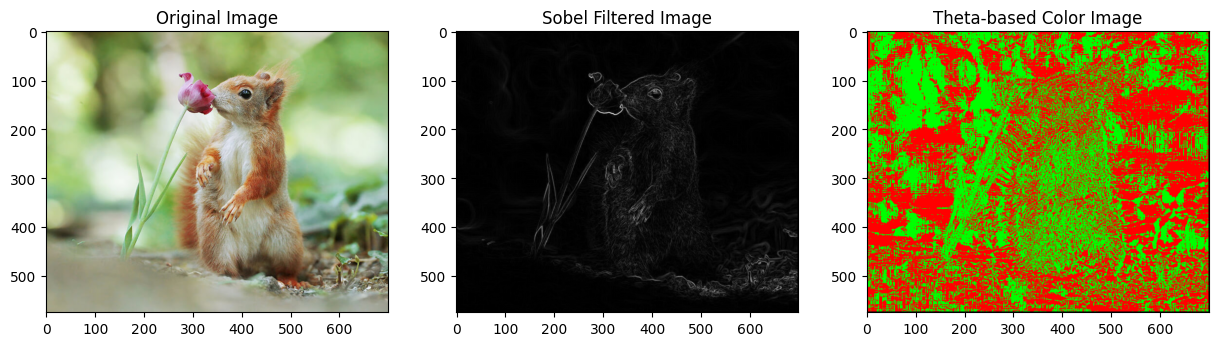

In [8]:
# #---------------------------------------------------------------------------------------------------------------------
# PART II - Applying the Sobel operator
# #---------------------------------------------------------------------------------------------------------------------

"""
The kernels Gx and Gy can be thought of as a differential operation in the "input_image" array in the directions x and y 
respectively. These kernels are represented by the following matrices:
      _               _                   _                _
     |                 |                 |                  |
     | 1.0   0.0  -1.0 |                 |  1.0   2.0   1.0 |
Gx = | 2.0   0.0  -2.0 |    and     Gy = |  0.0   0.0   0.0 |
     | 1.0   0.0  -1.0 |                 | -1.0  -2.0  -1.0 |
     |_               _|                 |_                _|
"""

# Here we define the matrices associated with the Sobel filter
Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
[rows, columns] = np.shape(grayscale_image)  # we need to know the shape of the input grayscale image
sobel_filtered_image = np.zeros(shape=(rows, columns))  # initialization of the output image array (all elements are 0)

# Color image to store the output (red/green based on the angle)
color_image = np.zeros((rows, columns, 3), dtype=np.uint8)

# Now we "sweep" the image in both x and y directions and compute the output
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, grayscale_image[i:i + 3, j:j + 3]))  # x direction
        gy = np.sum(np.multiply(Gy, grayscale_image[i:i + 3, j:j + 3]))  # y direction
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)  # calculate the "hypotenuse"

        # Calculate the angle (Theta) in degrees
        if gx != 0:
            theta = np.arctan(gy / gx) * (180.0 / np.pi)
        else:
            theta = 90.0 if gy > 0 else -90.0  # Handle division by zero for vertical edges
        
        # Set the pixel color based on the angle
        if abs(theta) > 45:
            color_image[i + 1, j + 1] = [255, 0, 0]  # Red for angles greater than 45 degrees
        else:
            color_image[i + 1, j + 1] = [0, 255, 0]  # Green for angles less than or equal to 45 degrees


# Display the original image and the Sobel filtered image
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(input_image, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(sobel_filtered_image, cmap='gray')
ax2.set_title('Sobel Filtered Image')
ax3.imshow(color_image)
ax3.set_title('Theta-based Color Image')
plt.show()